# Download Summary Plots

Take the data_statistics.csv file that shows us how many images we have for species. Merge with the moths list CSV file. Then create a histogram to see how many images we have for each species.

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(2,10)})
plt.figure(figsize=(2,5))

<Figure size 200x500 with 0 Axes>

<Figure size 200x500 with 0 Axes>

In [4]:
home_dir = os.path.dirname(os.getcwd())
home_dir

'/bask/projects/v/vjgo8416-amber/projects/gbif_download_standalone'

In [12]:
def report_image_counts(stat_path, region_name, zoom_cutoff=400):
    data_stats = pd.read_csv(stat_path)
    n_species = len(data_stats)

    # How many with 1000? 
    n_species_1000 = len(data_stats[data_stats["n_imgs"] == 1000])
    print(f"{n_species_1000} species have 1000 images (out of {n_species})")

    n_species_0 = len(data_stats[data_stats["n_imgs"] == 0])
    print(f"{n_species_0} species have 0 images (out of {n_species})")
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 3))
    sns.histplot(data_stats,  
                ax=ax[0],
                x="n_imgs",
                binwidth=20).set(title=f"Histogram of image counts for {region_name} species")

    ax[0].set_xlabel("Image count")
    ax[0].set_ylabel("Species count")
    
    sns.histplot(data_stats.loc[data_stats['n_imgs'] <= 400, ],
                ax=ax[1],
                  x="n_imgs",
                  binwidth=20).set(title=f"Histogram of image counts for {region_name} species (zoomed to n ≤ {zoom_cutoff})")

    ax[1].set_xlabel("Image count")
    ax[1].set_ylabel("Species count")


## Downloaded Images

565 species have 1000 images (out of 2690)
126 species have 0 images (out of 2690)


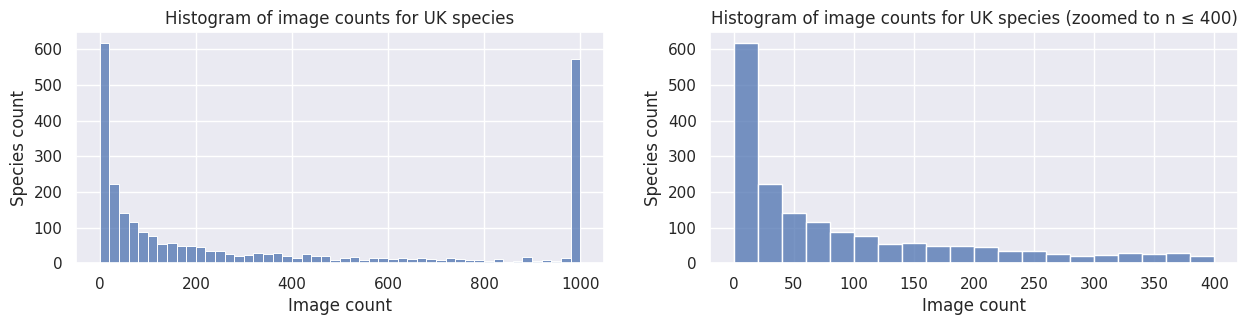

In [13]:
checklist_name = "uksi-moths-keys"
uk_path = os.path.join(home_dir,"data_stats_files","data_stats_"+checklist_name+".csv")

report_image_counts(uk_path, "UK")

49 species have 1000 images (out of 1345)
194 species have 0 images (out of 1345)


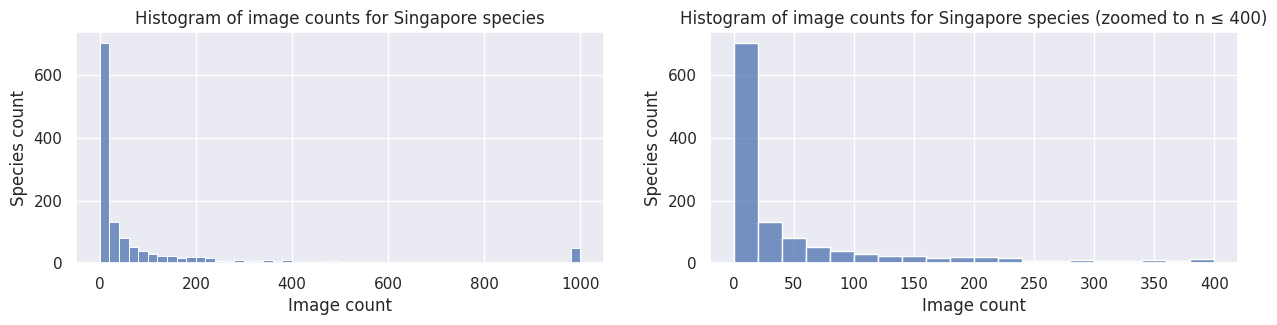

In [14]:
checklist_name = "singapore-moths-keys"
singapore_path = os.path.join(home_dir,"data_stats_files","data_stats_"+checklist_name+".csv")

report_image_counts(singapore_path, "Singapore")

## Cropped Images

First lets calculate the data statistics for the cropped images. 

In [15]:
import os

def report_crop_images(checklist_name, 
                       region_name, 
                       image_path = '/bask/homes/f/fspo1218/amber/data/binary_moth_training/gbif_crops/', 
                       zoom_cutoff=400, 
                       add_missing=True):
    
    result = [os.path.join(dp, f) for dp, dn, filenames in os.walk(image_path) for f in filenames if os.path.splitext(f)[1] == '.jpg']
    checklist_path = os.path.join("/bask/projects/v/vjgo8416-amber/projects/gbif_download_standalone/species_checklists/"+checklist_name+"-nodup.csv")

    checklist_species = pd.read_csv(checklist_path)

    df = pd.DataFrame({'path':result})

    df['species'] = [os.path.basename(os.path.dirname(path)) for path in df['path']]
    df['genus'] = [os.path.basename(os.path.dirname(os.path.dirname(path))) for path in df['path']]
    df['family'] = [os.path.basename(os.path.dirname(os.path.dirname(os.path.dirname(path)))) for path in df['path']]
    df = df.loc[df['species'] != '.ipynb_checkpoints', ]

    df2 = df[['species', 'genus', 'family']].value_counts()
    df2 = df2.reset_index(name='counts')
    df2.columns = ['species', 'genus', 'family', 'n_imgs']

    df2 = df2.loc[df2['species'].isin(checklist_species['gbif_species_name']), ]
    
    # For each checklist_species not included, add a row with 0
    if add_missing:
        checklist_missing = checklist_species.loc[~checklist_species['gbif_species_name'].isin(df2['species']), ]
        checklist_missing = checklist_missing[['gbif_species_name', 'genus_name', 'family_name']]
        checklist_missing['n_imgs'] = 0
        checklist_missing.columns = ['species', 'genus', 'family', 'n_imgs']
        df2 = pd.concat([df2, checklist_missing])
    
    # How many with 500? 
    n_species=df2.shape[0]
    n_species_500 = len(df2[df2["n_imgs"] >= 500])
    print(f"{n_species_500} species have ≥ 500 images (out of {n_species})")

    n_species_0 = len(df2[df2["n_imgs"] == 0])
    print(f"{n_species_0} species have 0 images (out of {n_species})")
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 3))
    sns.histplot(df2,  
                ax=ax[0],
                x="n_imgs",
                binwidth=20).set(title=f"Histogram of cropped image counts for {region_name} species")

    ax[0].set_xlabel("Image count")
    ax[0].set_ylabel("Species count")
    
    sns.histplot(df2.loc[df2['n_imgs'] <= 400, ],
                ax=ax[1],
                  x="n_imgs",
                  binwidth=20).set(title=f"Histogram of cropped image counts for {region_name} species\n(zoomed to n ≤ {zoom_cutoff})")

    ax[1].set_xlabel("Image count")
    ax[1].set_ylabel("Species count")

1 species have ≥ 500 images (out of 24)
0 species have 0 images (out of 24)


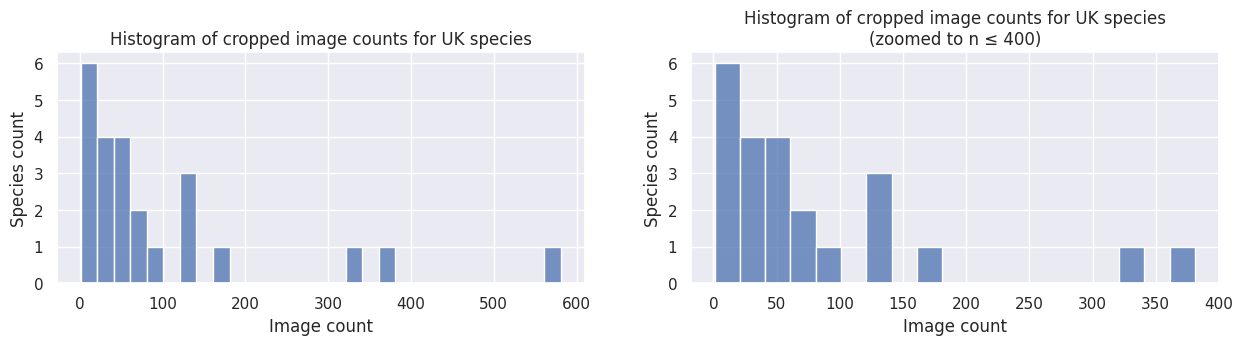

In [16]:
report_crop_images("uksi-moths-keys", "UK", add_missing=False)

0 species have ≥ 500 images (out of 0)
0 species have 0 images (out of 0)


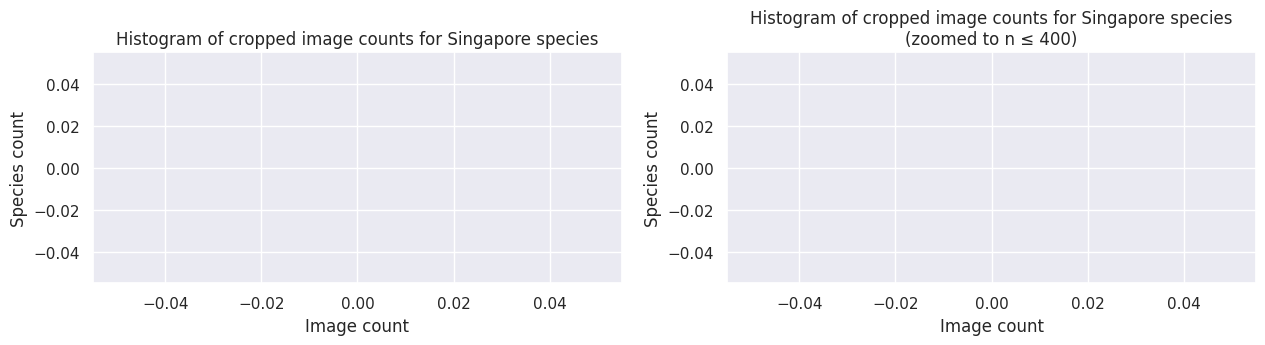

In [11]:
report_crop_images("singapore-moths-keys", "Singapore", add_missing=False)

0 species have ≥ 500 images (out of 0)
0 species have 0 images (out of 0)


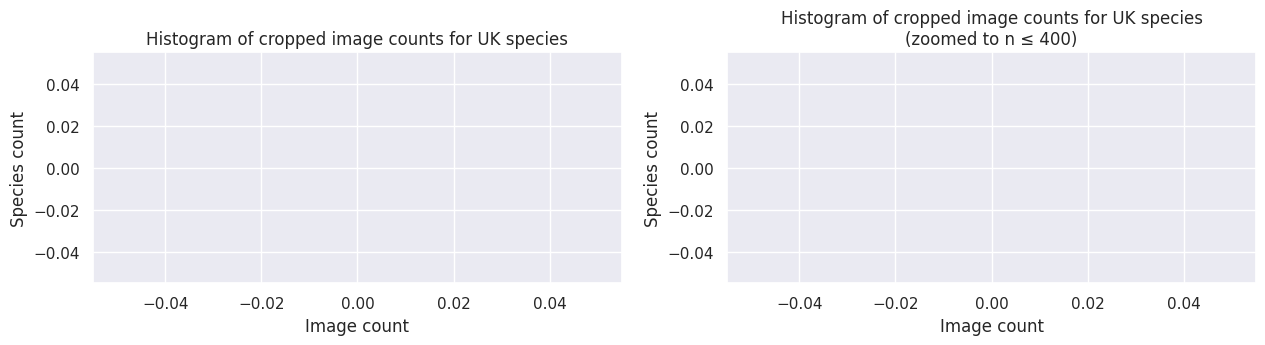

In [148]:
report_crop_images("costarica-moths-keys", "Costa Rica", add_missing=False)